# Dendritic Growth

In experiments, Dendrites select a unique radius of curvature $R_{tip}$ and growth velocity $v_{tip}$ for a specific undercooling $\Delta T$. The Lipton-Glicksman-Kurz (LGK) model is an approximate solution for $(R_{tip},v_{tip})$ based on the marginal stability theory.

The $R_{tip}$ and $v_{tip}$ can be found by solving the following equations:

$$\Delta T = \frac{2\Gamma_{sl}}{R_{tip}} - m_l C_0 \frac{(1-k) Iv_{3D}(Pe_C)}{1-(1-k) Iv_{3D}(Pe_C)}$$

$$R_{tip}^2 v = -\bigg( \frac{1}{\sigma^{*}} \bigg)^2 \frac{2D_l \Gamma_{sl}}{m C_0 (1-k)}$$

Where $Iv_{3D}$ is the Ivantsov function given by

$$Iv_{3D}(x) = x E_1(x) e^{x}$$

$E_1$ is the exponential integral

$$E_1(x) = \int_x^\infty \frac{e^{-y}}{y} dy$$


#### Peclet numbers:

Here, Pe_T and Pe_C are thermal and soultal peclet numbers, respectively.

$$Pe_T = \frac{R_{tip}v^{*}}{2\alpha}$$

$$Pe_C = \frac{R_{tip}v^{*}}{2D}$$

In [3]:
# import reqired libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import exp1
from scipy.optimize import fsolve

% matplotlib inline

In [39]:
# Define stuff

# From values for Nickel

rho = 8900           # density                  Kg/m^3
L_f = 297000*rho     # Heat of fusion           J/m^3
C_p = 910            # Specific heat            J/(Kg.K)
k_l = 94             # Conductivity of liquid   W/(m.K) (value at 665 C)
a_l = k_l/(rho*C_p)  # Thermal diffusivity of liquid


# For X_Cu = 0.1

C_0 = 0.1         
k = 0.82
m = -256.167         # Liquidus slope  K
D = 1e-06         # Solute Diffusivity m^2/s
T_m = 1701.172       # Melting Point K
gam = 0.38           # Surface energy J/m^2

Gam = 2.4e-7    # Gibbs-Thomson Parameter


# Ivantsov function

def I3(P):
    
    return P*exp1(P)*np.exp(P)

# Peclet number

def P_c(R,v):
    
    return R*v/(2*D)

# define functions to optimize

def fun1(R,v,delT):
    
    #t_t = L_f/C_p*I3(P_t(R,v))
    t_c = -m*C_0*(1-k)*I3(P_c(R,v))/(1 - (1-k)*I3(P_c(R,v)))
    t_r = 2*Gam/R
    
    return delT - (t_c + t_r)

def fun2(R,v,sigma):
    
    return R*R*v + Gam*2*D/(sigma*sigma*m*C_0*(1-k))

### Stefan number vs Peclet number

$$St = Iv_{3D}(Pe_T)$$

Text(0,0.5,'Stefan Number')

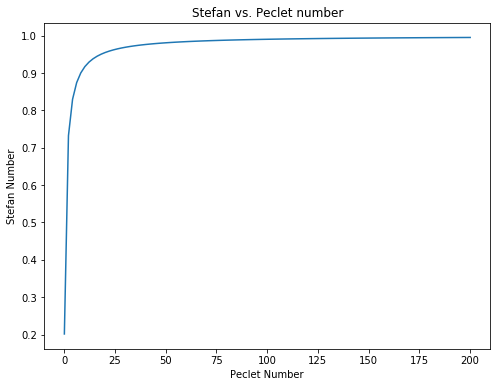

In [40]:
fig,ax = plt.subplots(figsize=(8,6))

Pes = np.linspace(0.1,200,100)
ax.set_title("Stefan vs. Peclet number")
ax.plot(Pes,I3(Pes))

ax.set_xlabel("Peclet Number")
ax.set_ylabel("Stefan Number")

In [53]:
# For some values of R, solve for values of v_tip to get an idea of peclet number range

def funs(v_n,R_n):
    return fun1(R_n,v_n,1)

Rs = np.array([1e-6,3e-6,5e-6,1e-5,8e-6,4e-7])
#Rs = np.array([1e-3,3e-6,5e-6,1e-5,8e-6]) # delT = 0.05
vs = np.array([fsolve(funs,1e-4,R) for R in Rs])[:,0]
print(Rs,vs)
np.multiply(Rs,vs)

[1.e-06 3.e-06 5.e-06 1.e-05 8.e-06 4.e-07] [0.07884964 0.0536879  0.03613058 0.01960752 0.02402    0.0001    ]


/home/rohith/installations/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([7.88496449e-08, 1.61063691e-07, 1.80652909e-07, 1.96075238e-07,
       1.92160021e-07, 4.00000000e-11])

### $R_{tip}$ and $v_{tip}$ as functions of undercooling:

In [49]:
def opt_fn(x,delT,sigma):
    
    R = x[0]
    v = x[1]
    
    return fun1(R,v,delT),fun2(R,v,sigma)

fsolve(opt_fn,[1e-5,2e-2],args=(1.6,0.15))

array([1.02846683e-05, 4.37403702e-02])

In [54]:
opt_fn([1.02846683e-05, 4.37403702e-02],1.6,0.15)

(-1.6289281035142267e-09, 1.441666351651606e-20)

Now, we can solve these equations for different values of undercooling $\Delta T$. Since this approximation works only for small undercoolings, we take values below 2K.

/home/rohith/installations/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


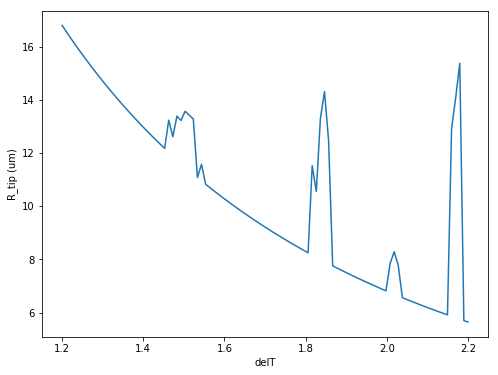

In [58]:
# sigma = 0.15

Temps = np.linspace(1.2,2.2,100)
Rvtips = np.array([fsolve(opt_fn,[1e-5,2e-2],args=(Temp,0.15)) for Temp in Temps])
Rvtips = np.append(np.array([Temps]).T,Rvtips,1)

fig,ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("delT")
ax.set_ylabel("R_tip (um)")
ax.plot(Rvtips[:,0],Rvtips[:,1]*1000000)

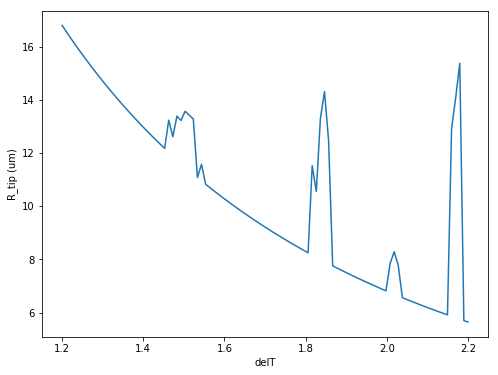

In [95]:
# Ignore the values where there is bad convergence

Rvtips = Rvtips[Rvtips[:,2]!=1e-3]
Rvtips = Rvtips[Rvtips[:,1]!=1e-6]


# plotting

fig,ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("delT")
ax.set_ylabel("R_tip (um)")
ax.plot(Rvtips[:,0],Rvtips[:,1]*1000000)

We will choose only the values where the converged solution is closer to zero than a certain norm

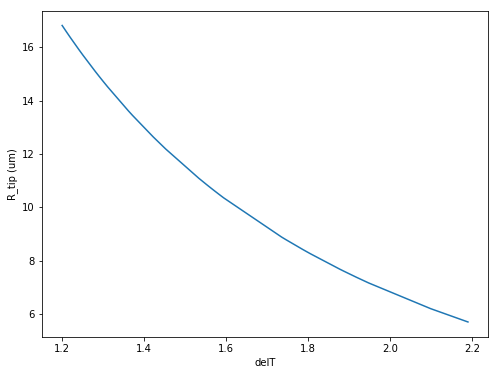

In [97]:
Norms = np.array([np.linalg.norm(opt_fn(Rvtip[1:],Rvtip[0],0.15)) for Rvtip in Rvtips])
Rvtips = Rvtips[Norms<1e-13]

fig,ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("delT")
ax.set_ylabel("R_tip (um)")
ax.plot(Rvtips[:,0],Rvtips[:,1]*1000000)



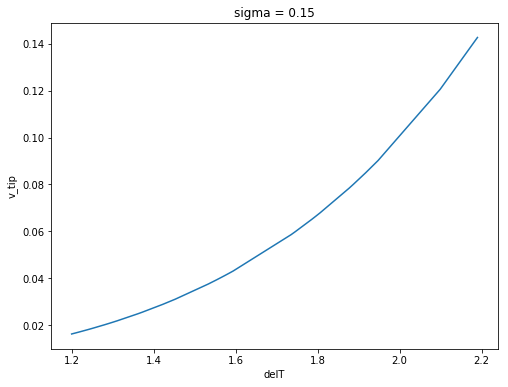

In [98]:
fig,ax = plt.subplots(figsize=(8,6))

ax.set_title("sigma = 0.15")
ax.set_xlabel("delT")
ax.set_ylabel("v_tip")
ax.plot(Rvtips[:,0],Rvtips[:,2])